In [83]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import cv2

### 1- Data Preprocessing

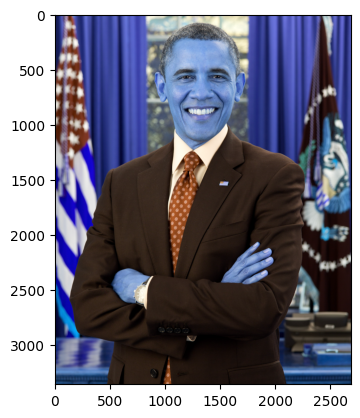

In [84]:
# Read one image with opencv
img=cv2.imread("./test_images/Obama.jpg")
plt.imshow(img)

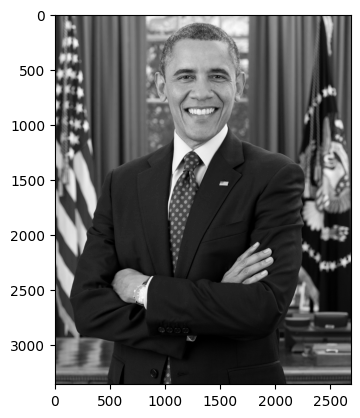

In [85]:
# convert this image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [86]:
gray.shape

(3356, 2687)

In [87]:
#detect face and eyes using Haar Cascade Classifier
face_cascade= cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces= face_cascade.detectMultiScale(gray, 1.5, 5)
faces  #this var return the x, y, width and heigh of the gray image

array([[889, 188, 923, 923]])

In [88]:
#show values of X, y, width and heigh
[x, y, w, h]= faces[0]
x, y, w, h

(889, 188, 923, 923)

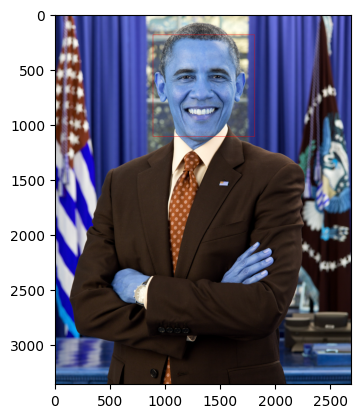

In [89]:
# draw a rectangle and put the cropped face in it
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

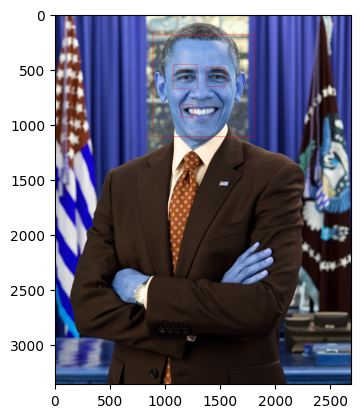

In [90]:
# detect face and eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

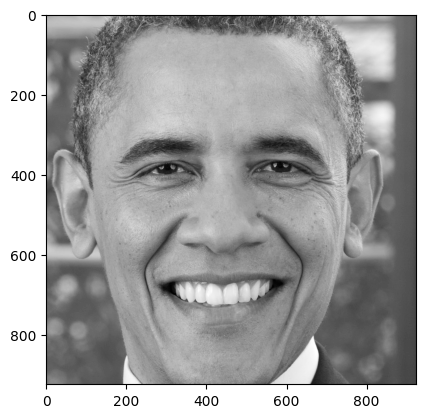

In [91]:
plt.imshow(roi_gray, cmap='gray')

In [92]:
def get_cropped_img_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print("Failed to read the image:", image_path)
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if gray is None:
        print("Failed to convert image to grayscale:", image_path)
        return None
    
    # Rest of your code...
    faces= face_cascade.detectMultiScale(gray, 1.5, 3)
    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color


In [93]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped_data/"

In [94]:
import os
img_dirs= []
#scan dataset directory 
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [95]:
img_dirs

['./datasets/barack_obama',
 './datasets/cropped_data',
 './datasets/Elon_Musk',
 './datasets/mark_zuckerberg',
 './datasets/stev_jobs',
 './datasets/sundar_pichai']

In [96]:
import shutil
# After fiding subdirectories, out them into the new cropped_data folder
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [97]:
cropped_img_dirs= []
celebrity_file_names_dict= {}
for img_dir in img_dirs:
    count=1
    celebrity_name= img_dir.split('/')[-1] #take just the name of the file after /
    print( celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]= []
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_img_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrity_name
            #if the cropped folder doesn't exist, create it
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("GENERATING CROPPED IMAGES IN CROPPEDFOLDER:", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            #save the image into the cropped_file_path
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

barack_obama
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/barack_obama
cropped_data
Failed to read the image: ./datasets/cropped_data\barack_obama
Elon_Musk
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/Elon_Musk
Failed to read the image: ./datasets/Elon_Musk\Elon-Musk-Wants-Comedy-on-Twitter_-Can’t-Take-a-Joke-Alamy-2JACR0P.jpg
mark_zuckerberg
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/mark_zuckerberg
stev_jobs
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/stev_jobs
sundar_pichai
GENERATING CROPPED IMAGES IN CROPPEDFOLDER: ./datasets/cropped_data/sundar_pichai


In [102]:
IMAGE_SIZE=273
BATCH_SIZE=16
CHANNEL=3
EPOCHS=10

## preprocess new cropped_data

In [103]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "./datasets/cropped_data/",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 209 files belonging to 5 classes.


In [104]:
class_names= dataset.class_names
class_names


['Elon_Musk', 'barack_obama', 'mark_zuckerberg', 'stev_jobs', 'sundar_pichai']

In [105]:
len(dataset)
#becauz every element in the dataset is a batch of 16 image :13*16=208, 1 batch contain 16 images

14

In [106]:
for image_batch, label_batch in dataset.take(1):
    print( image_batch.shape)
    print(label_batch.numpy())

(16, 273, 273, 3)
[0 2 1 2 2 4 2 4 2 2 2 1 0 0 0 1]


In [107]:
for image_batch, label_batch in dataset.take(1):
    print( image_batch[0])
    print(label_batch[0].numpy())

tf.Tensor(
[[[129.       141.       155.      ]
  [129.       141.       155.      ]
  [129.       141.       155.      ]
  ...
  [160.16666  164.       172.66669 ]
  [159.5      165.       174.5     ]
  [159.       166.       176.      ]]

 [[129.       141.       155.      ]
  [129.       141.       155.      ]
  [129.       141.       155.      ]
  ...
  [164.91661  167.16663  173.99997 ]
  [164.       167.75     175.5     ]
  [164.       169.       177.5     ]]

 [[129.       141.       155.      ]
  [129.       141.       155.      ]
  [129.       141.       155.      ]
  ...
  [169.55544  170.05545  174.58322 ]
  [167.       168.58333  174.16667 ]
  [166.5      168.83333  175.5     ]]

 ...

 [[138.       155.       175.      ]
  [137.5      154.5      174.5     ]
  [137.       154.       174.      ]
  ...
  [ 74.77794   86.22242  102.69461 ]
  [ 85.5833   100.49994  119.91652 ]
  [ 92.666626 109.99994  131.6665  ]]

 [[138.       155.       175.      ]
  [137.5      154.5      1

### Data Visualization

In [108]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 273, 273, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

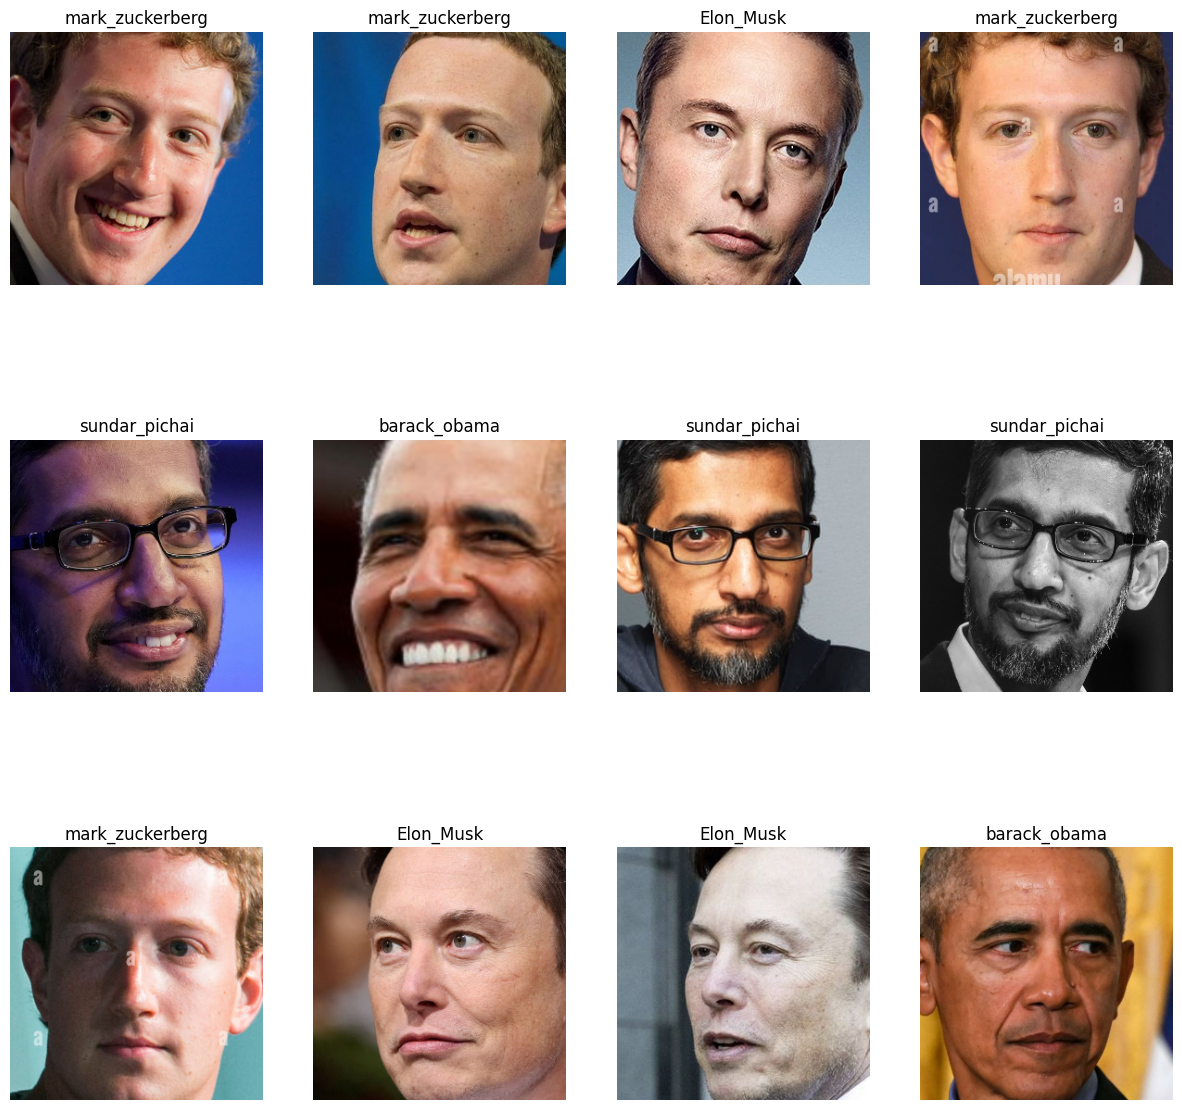

In [109]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

### Feature engineering

In [110]:
#from sklearn.model_selection import train_test_split

In [111]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    #image normalization
    imArray /= 255;
    # compute coefficients 
    #Performs the 2D wavelet decomposition on the normalized image array using the specified wavelet mode and decomposition level. This step computes the wavelet coefficients at different scales.
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  #Converts the wavelet coefficients to a list format. The coefficients are returned as a tuple by default, and this step allows us to modify the coefficients.
    # Sets the approximation coefficients (the first element in coeffs_H) to zero. This effectively removes the low-frequency components from the image.
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

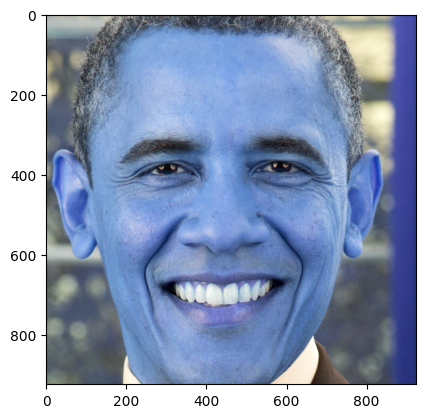

In [112]:
cropped_img= get_cropped_img_2_eyes("./test_images/Obama.jpg")
plt.imshow(cropped_img)

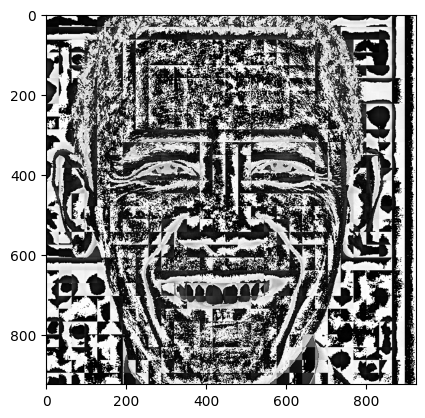

In [80]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [81]:
celebrity_file_names_dict

{'barack_obama': ['./datasets/cropped_data/barack_obama/barack_obama1.png',
  './datasets/cropped_data/barack_obama/barack_obama2.png',
  './datasets/cropped_data/barack_obama/barack_obama3.png',
  './datasets/cropped_data/barack_obama/barack_obama4.png',
  './datasets/cropped_data/barack_obama/barack_obama5.png',
  './datasets/cropped_data/barack_obama/barack_obama6.png',
  './datasets/cropped_data/barack_obama/barack_obama7.png',
  './datasets/cropped_data/barack_obama/barack_obama8.png',
  './datasets/cropped_data/barack_obama/barack_obama9.png',
  './datasets/cropped_data/barack_obama/barack_obama10.png',
  './datasets/cropped_data/barack_obama/barack_obama11.png',
  './datasets/cropped_data/barack_obama/barack_obama12.png',
  './datasets/cropped_data/barack_obama/barack_obama13.png',
  './datasets/cropped_data/barack_obama/barack_obama14.png',
  './datasets/cropped_data/barack_obama/barack_obama15.png',
  './datasets/cropped_data/barack_obama/barack_obama16.png',
  './datasets/cro

In [114]:
class_dict = {}
count = 0
for celebrity_name in class_names:
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Elon_Musk': 0,
 'barack_obama': 1,
 'mark_zuckerberg': 2,
 'stev_jobs': 3,
 'sundar_pichai': 4}

In [116]:
X, y= [], []

for training_files in class_names:
    for training_image in training_files:
        img= cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img= cv2.resize(img, (32,32))
        #set wv transfomed to same size as the scaleed raw image
        img_har= w2d(img, 'db1', 5)
        scalled_img_har= cv2.resize(img_har, (32,32))
        #vertically stack the images: scalled raw img and the waveled scaled tranform image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [119]:
len(X)

AttributeError: 'list' object has no attribute 'shape'

In [118]:
len(X[0])

IndexError: list index out of range